# Flange cut

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [2]:
doe = pd.read_csv('../data/doe.csv')
doe

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.00,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
1,2,5,1.48,400,2.4,3,-4,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
2,3,1,1.00,210,2.4,3,-1,70,70.2,1.71,2.00,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
3,4,2,1.19,390,2.4,3,5,30,70.2,1.71,2.00,200.03813,DC01_1.20mm,160.714935,174.535075,564.455438,424.931018,490.442223
4,5,1,1.00,360,1.6,2,3,30,71.8,1.14,1.33,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,1.01,90,1.6,2,0,70,71.8,1.14,1.33,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
996,997,4,0.99,480,2.4,3,5,30,70.2,1.71,2.00,71.94184,AA5083_1.00mm,248.796491,251.315902,385.373316,371.774337,384.299873
997,998,5,1.48,490,2.4,3,3,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
998,999,5,1.48,120,2.4,3,-3,30,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834


In [3]:
# Load the data using pandas
data = pd.read_csv('../data/cut_flange_all.csv')
data.drop(data[data.doe_id == 1000].index, inplace=True)
data.drop(data[data.doe_id == 247].index, inplace=True)
data

,doe_id,c_phi,c_rho,c_z
0,1,1.221730,430.0,0.579342
1,1,1.225256,430.0,0.578100
2,1,1.228782,430.0,0.576825
3,1,1.232308,430.0,0.575515
4,1,1.235834,430.0,0.574172
...,...,...,...,...
87995,999,1.556693,430.0,2.169996
87996,999,1.560219,430.0,2.167220
87997,999,1.563744,430.0,2.164534
87998,999,1.567270,430.0,2.161939


In [4]:
from mesh_predictor import CutPredictor

reg = CutPredictor()
reg.load_data(
    doe = doe,
    data = data,
    index='doe_id',
    process_parameters = [
        'Blechdicke', 
        'Niederhalterkraft', 
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe',
        'Stempel_ID',
    ],
    categorical = [
        'Ziehspalt', 
        'Ziehtiefe',
        'Stempel_ID',
    ],
    position = 'c_phi',
    output = 'c_z',
    validation_split=0.1,
    validation_method='leaveoneout'
)
reg.save_config("../models/cut_flange.pkl")
reg.data_summary()

Data summary
------------------------------------------------------------

Process parameters:
	- Blechdicke : numerical [ 0.99  ...  1.48 ]
	- Niederhalterkraft : numerical [ 10  ...  500 ]
	- Ziehspalt : categorical [1.6, 2.4]
	- Einlegeposition : numerical [ -5  ...  5 ]
	- Ziehtiefe : categorical [30, 50, 70]
	- Stempel_ID : categorical [2, 3]
Input variables:
	- c_phi : numerical, [ 1.2217304763960306 / 1.5707963267948966 ] 
Output variable(s):
	- c_z : numerical, [ 0.0401206149999993 / 3.6027990824451805 ]

Inputs (87900, 11)
Outputs (87900, 1)
Total number of experiments: 879
Total number of samples: 87900
Number of training samples: 79200
Number of test samples: 8700
Number of experiments in the test set: 87


In [ ]:
best_config = reg.autotune(
    save_path='../models/best_flange_model',
    trials=100,
    max_epochs=100, 
    layers=[3, 5],
    neurons=[64, 256, 64],
    dropout=[0.0, 0.5, 0.1],
    learning_rate=[1e-5, 1e-3]
)
print(best_config)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 re_lu_1 (ReLU)              (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 re_lu_2 (ReLU)              (None, 128)               0         
                                         

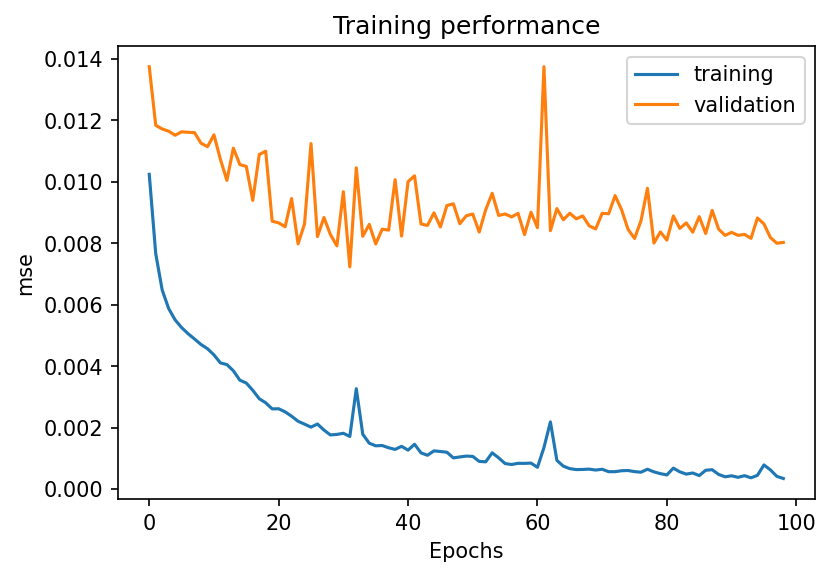

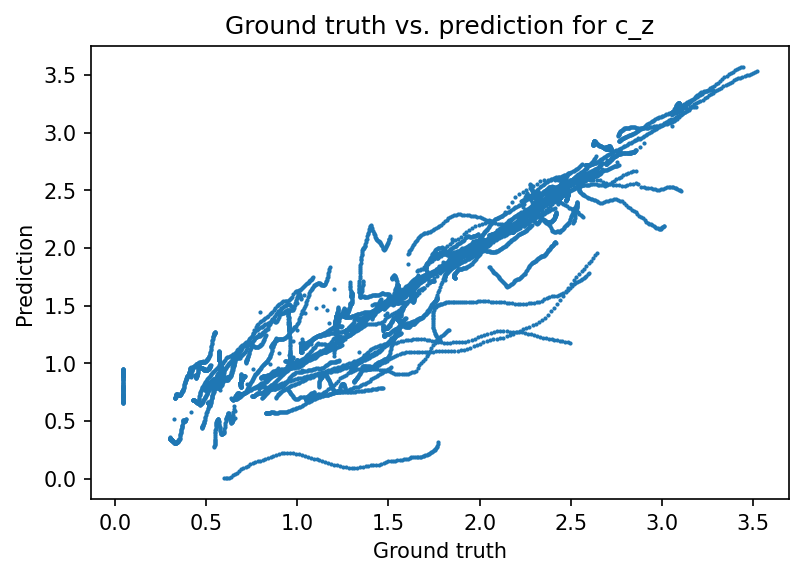

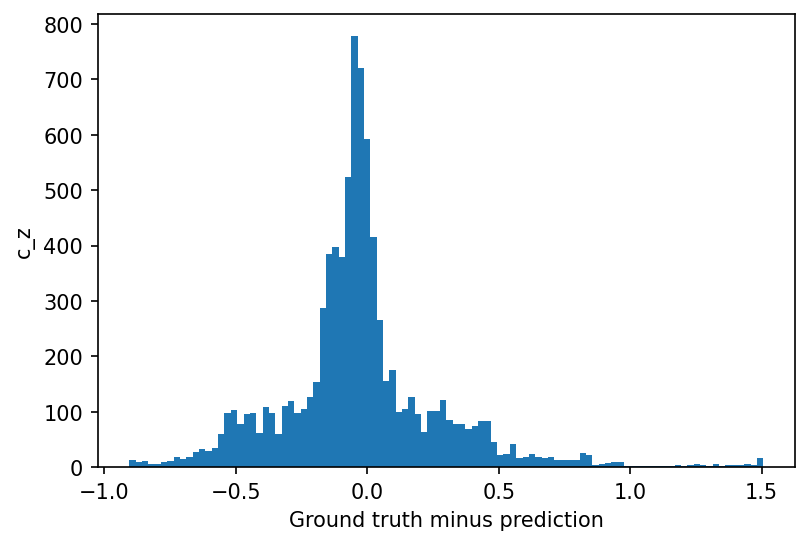

In [5]:
config = {
    'batch_size': 4096,
    'max_epochs': 100,
    'layers': [128, 128, 128, 128, 128],
    'dropout': 0.0,
    'learning_rate': 0.001
}

# or best_config from autotune if you already did it once

reg.custom_model(save_path='../models/best_flange_model', config=config, verbose=True)
reg.training_summary()

Doe_ID 261


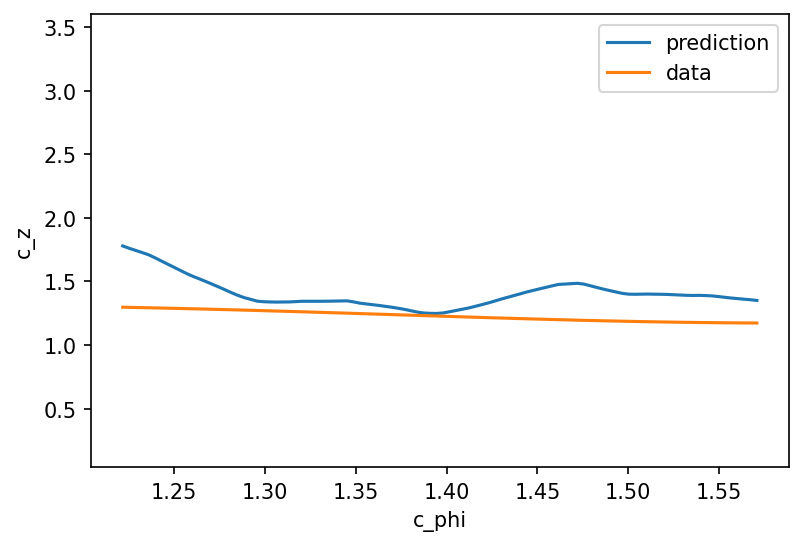

In [21]:
idx = np.random.choice(1000) + 1
print("Doe_ID", idx)
reg.compare(idx)

In [7]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

def viz(x, y):
    plt.figure()
    plt.plot(x, y[:, 0])
    plt.xlabel('c_phi')
    plt.ylabel('c_z')

reg.interactive(function=viz, positions=100)

interactive(children=(FloatSlider(value=1.1883700000000001, description='Blechdicke', max=1.48, min=0.99, step…